In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
#Get or Create Datasets
x,y = make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)

#Normalisation
u = np.mean(x,axis=0)
std = np.std(x,axis=0)
X = (x-u)/std

In [3]:
# Add a column of its vectorisation

ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [4]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_pred = hypothesis(X,theta)
    e = np.sum((y_pred-y)**2)
    
    return e/m

def gradient(X,y,theta):
    m = X.shape[0]
    y_pred = hypothesis(X,theta)
    grad = np.dot(X.T,(y_pred-y))
    return grad/m

#Batch Dradient Descent
def gradientDescent(X,y,learning_rate=0.01,max_itr=300):
    theta = np.zeros((X.shape[1],))
    error_list = []
    
    for i in range(max_itr):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        
        theta = theta - learning_rate*grad
    return theta,error_list

In [5]:
#When batch size is 1 it becomes socastic gradient descent
def batch_gradient_descent(X,y,batch_size=10,learning_rate=0.01,max_itr=10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1)))
    for i in range(max_itr):
        
        #Mini Batch Gradient Descent
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        for j in range(total_batches):
            batch_data = data[j*batch_size: (j+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
    return theta,error_list

264.08329543338755


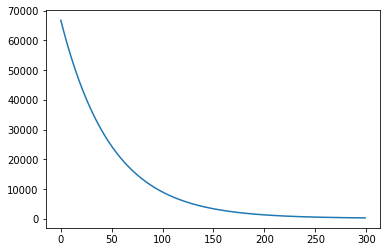

In [6]:
#For Batch Gradient Descent
theta,error_list = gradientDescent(X,y)

final_error = error_list[-1]
print(final_error)
plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

166.8696790819183


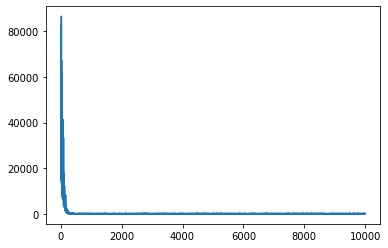

In [7]:
#For Mini Gradient Descent
theta,error_list = batch_gradient_descent(X,y)

final_error = error_list[-1]
print(final_error)
plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

### Mini Batch Advantages
- Faster Convergence
- Noisy Updates help to avoid local minima
- More Robust Convergence
- Vectorisation(Can alsp be used in batch GD but not in socastic GD)
- No need to load entire data in memory at a time